In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 7
fig_height = 5
fig_format = :retina
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie
  
  CairoMakie.activate!(type = string(fig_format))
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/run/media/alf/datos/misrepositorios/docencia/manual-julia"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


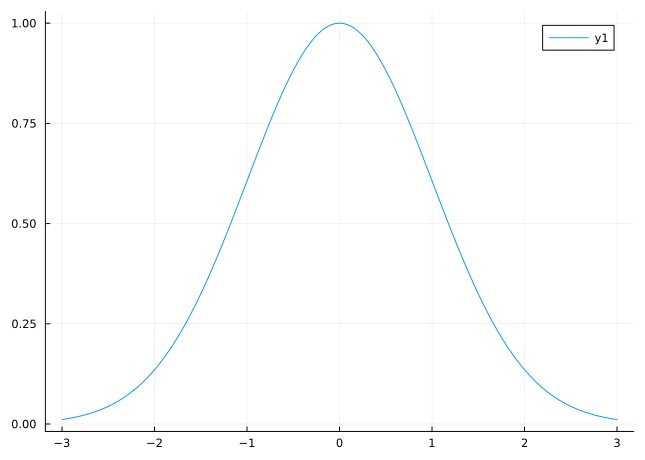

In [2]:
using Plots

f(x) = exp(-x^2 / 2)
plot(f, -3, 3)

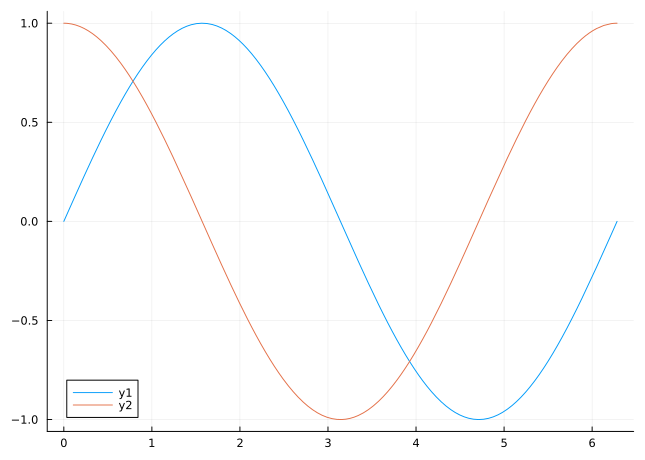

In [3]:
using Plots

f(x) = sin(x)
g(x) = cos(x)
plot(f, -0, 2π)
plot!(g)

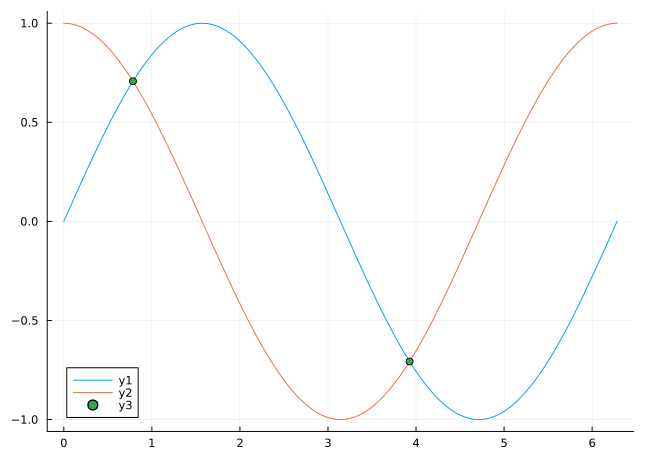

In [4]:
using Plots

f(x) = sin(x)
g(x) = cos(x)
plot(f, -0, 2π)
plot!(g)
x = [π/4, 5π/4]
y = sin.(x)
scatter!(x, y)

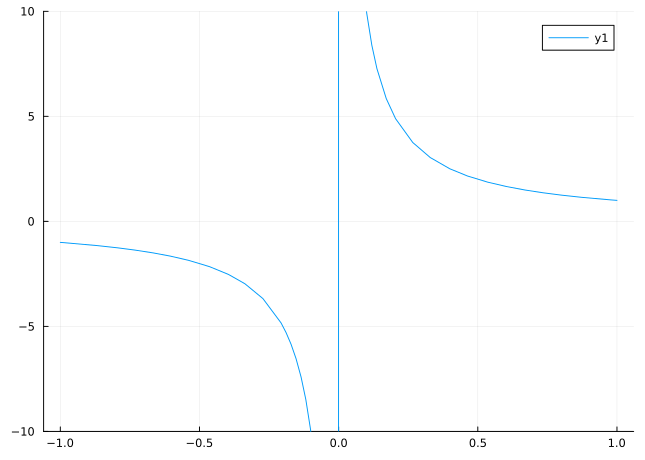

In [5]:
using Plots

f(x) = 1 / x
plot(f, -1, 1, ylims = (-10, 10))

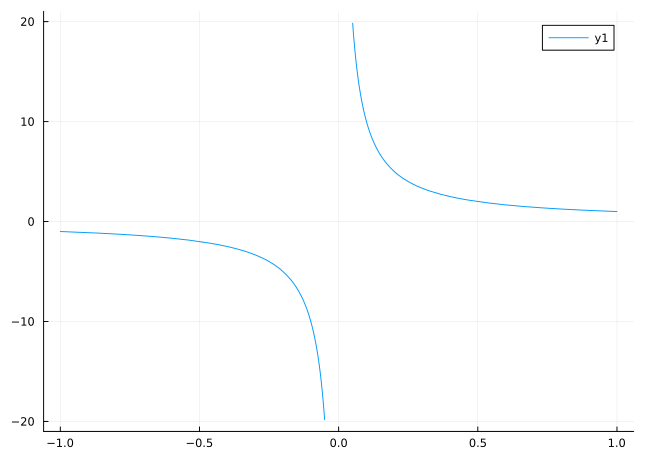

In [6]:
using Plots
using MTH229

f(x) = 1 / x
plot(rangeclamp(f), -1, 1)

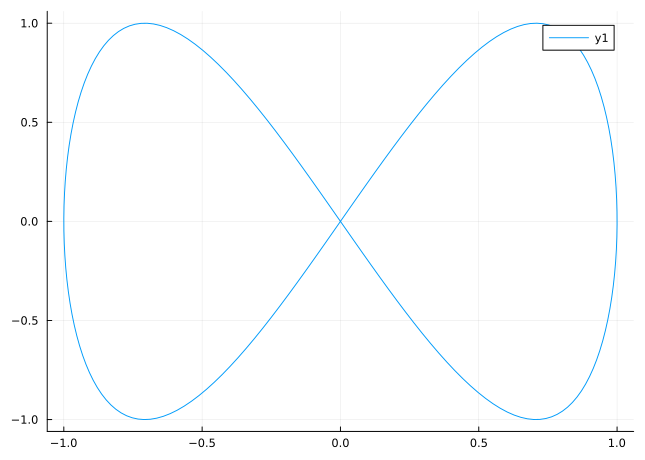

In [7]:
using Plots
f(x) = sin(x)
g(x) = sin(2x)
plot(f, g, 0, 2π)

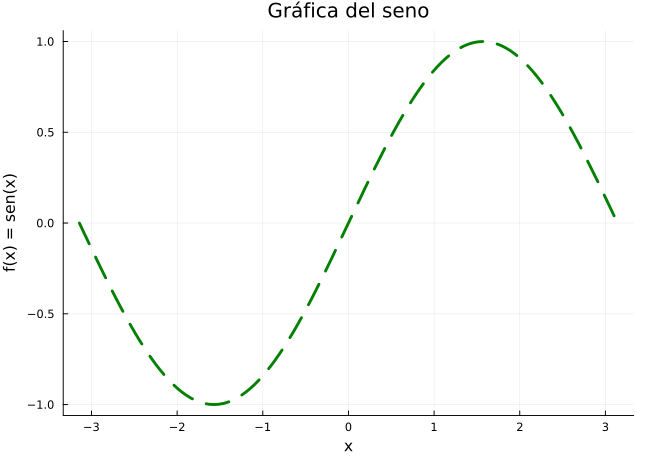

In [8]:
using Plots

f(x) = sin(x)
plot(f, -π, π, title = "Gráfica del seno",  xlab = "x", ylab = "f(x) = sen(x)",
  color = "green", linewidth = 3, linestyle = :dash, legend = false)

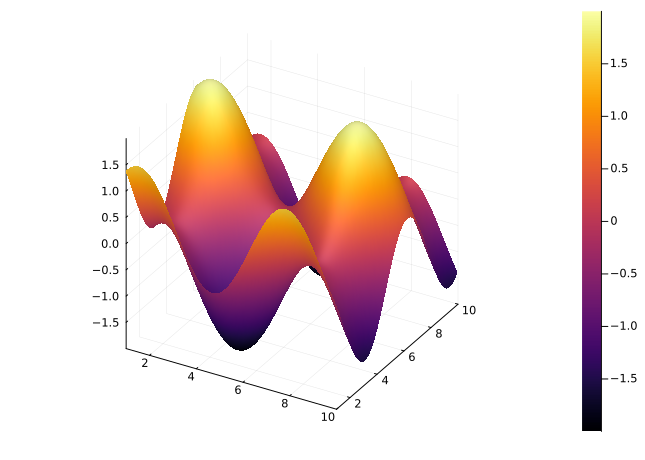

In [9]:
using Plots
xs = ys = range(1, stop=10, length=100)
f(x, y) = sin(x) + cos(y)
surface(xs, ys, f)

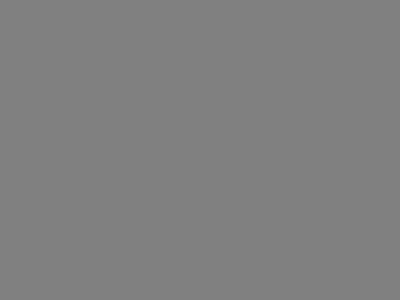

In [10]:
using GLMakie
fig = Figure(backgroundcolor = :gray, resolution = (400, 300))

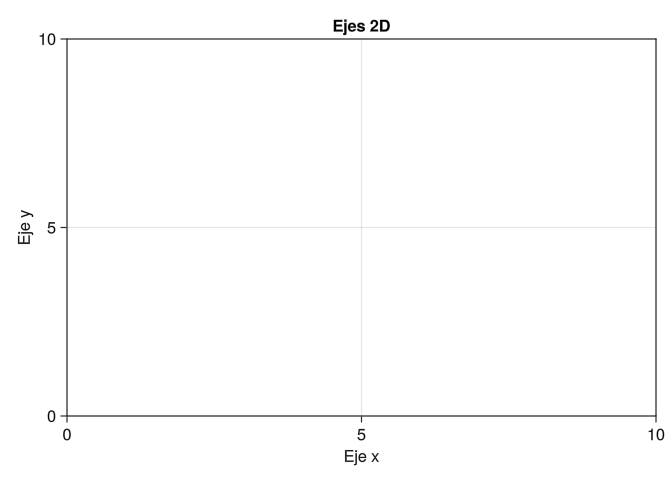

In [11]:
fig = Figure()
ax = Axis(fig[1,1], title = "Ejes 2D", xlabel = "Eje x", ylabel = "Eje y")
fig

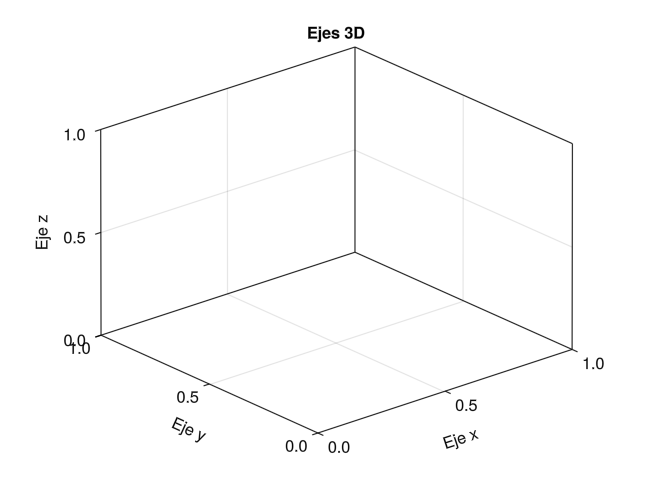

In [12]:
fig = Figure()
ax = Axis3(fig[1,1], title = "Ejes 3D", xlabel = "Eje x", ylabel = "Eje y", zlabel = "Eje z")
fig

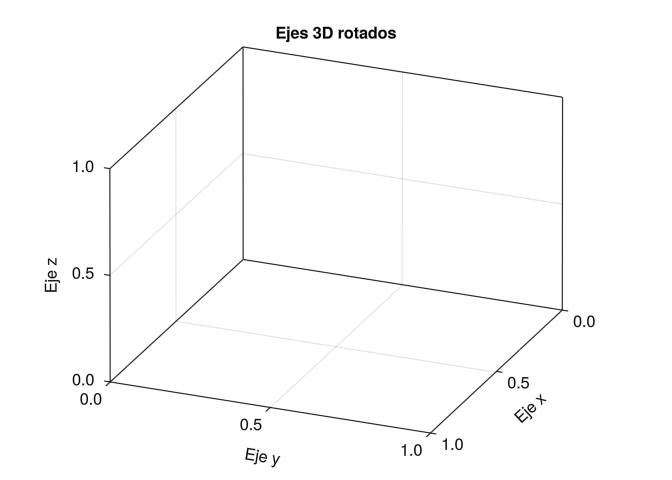

In [13]:
fig = Figure()
ax = Axis3(fig[1,1], title = "Ejes 3D rotados", xlabel = "Eje x", ylabel = "Eje y", zlabel = "Eje z", azimuth = pi/8)
fig

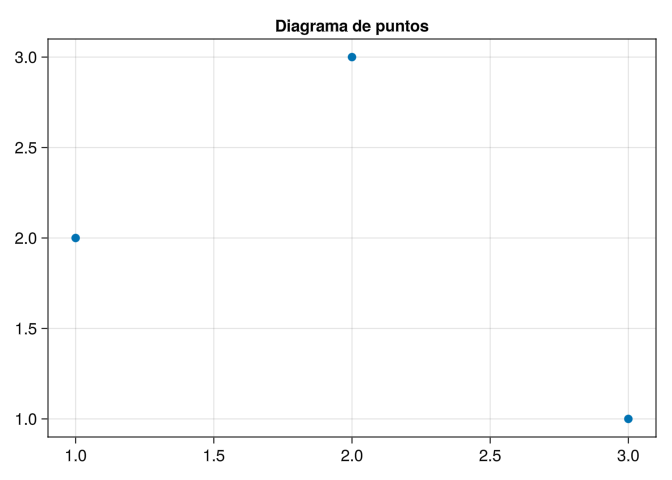

In [14]:
fig = Figure()
ax = Axis(fig[1, 1], title = "Diagrama de puntos")
xs = [1, 2, 3]
ys = [2, 3, 1]
Makie.scatter!(ax, xs, ys)
fig

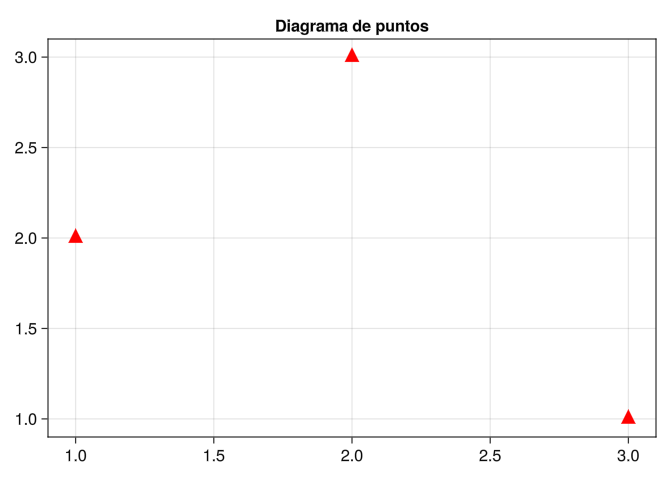

In [15]:
fig = Figure()
ax = Axis(fig[1, 1], title = "Diagrama de puntos")
xs = [1, 2, 3]
ys = [2, 3, 1]
Makie.scatter!(ax, xs, ys, marker = :utriangle, color= :red, markersize = 20)
fig

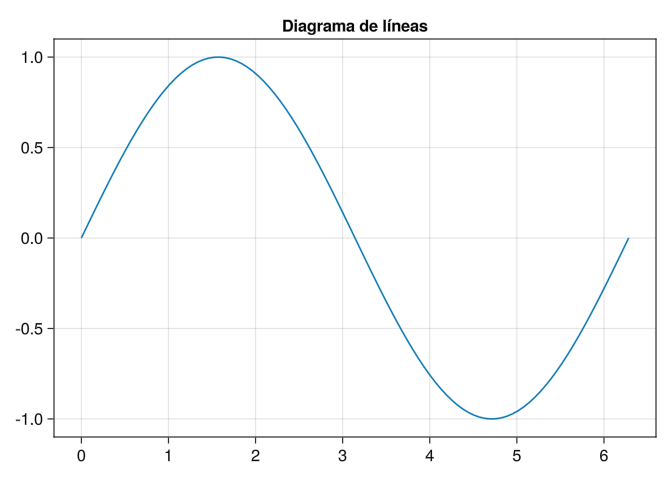

In [16]:
fig = Figure()
ax = Axis(fig[1, 1], title = "Diagrama de líneas")
xs = range(0, 2pi, length = 100)
ys = sin.(xs)
lines!(ax, xs, ys)
fig

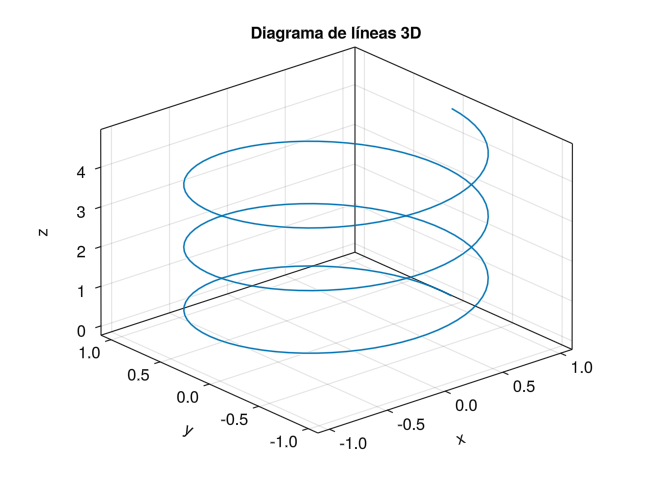

In [17]:
fig = Figure()
ax = Axis3(fig[1, 1], title = "Diagrama de líneas 3D")
ts = range(0, 6pi, length = 200)
xs = cos.(ts)
ys = sin.(ts)
zs = ts/4
lines!(ax, xs, ys, zs)
fig

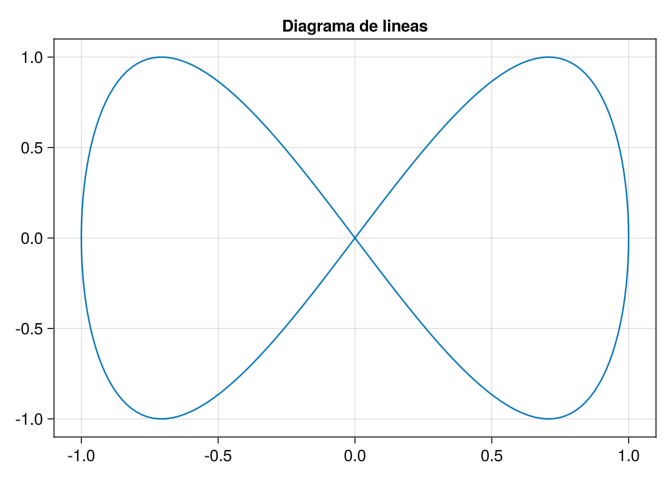

In [18]:
fig = Figure()
ax = Axis(fig[1, 1], title = "Diagrama de lineas")
ts = range(0, 2pi, length = 200)
points = Point.(cos.(ts), sin.(2ts))
lines!(ax, points)
fig

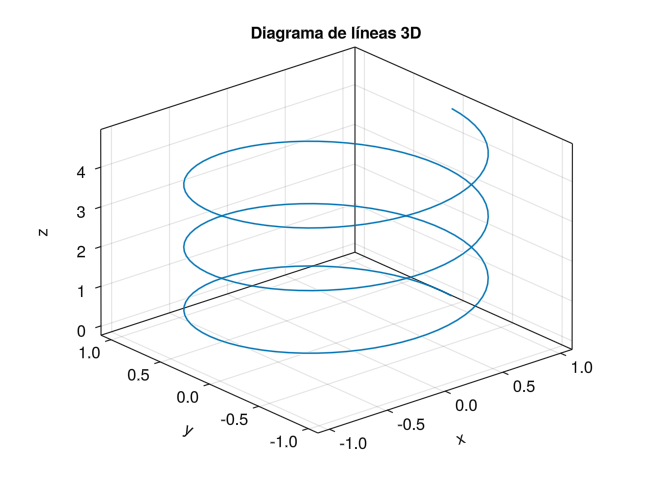

In [19]:
fig = Figure()
ax = Axis3(fig[1, 1], title = "Diagrama de líneas 3D")
ts = range(0, 6pi, length = 200)
f(t) = [cos(t), sin(t), t/4]
points = Point3.(f.(ts))
lines!(ax, points)
fig

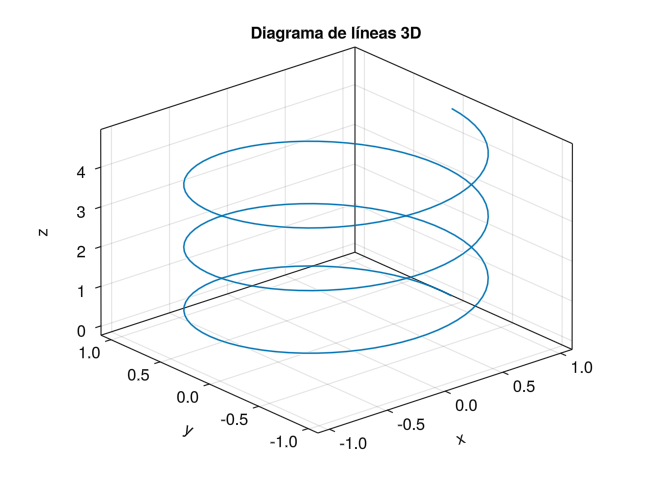

In [20]:
fig = Figure()
ax = Axis3(fig[1, 1], title = "Diagrama de líneas 3D")
ts = range(0, 6pi, length = 200)
f(t) = [cos(t), sin(t), t/4]
points = Point3.(f.(ts))
lines!(ax, points)
fig

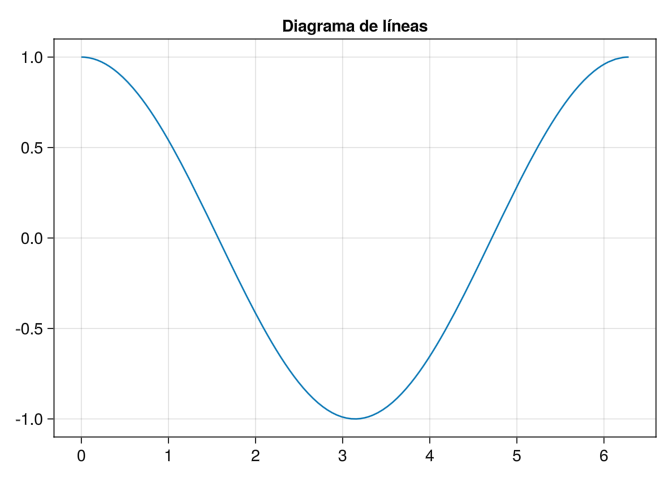

In [21]:
fig = Figure()
ax = Axis(fig[1, 1], title = "Diagrama de líneas")
lines!(ax, 0..2pi, cos)
fig

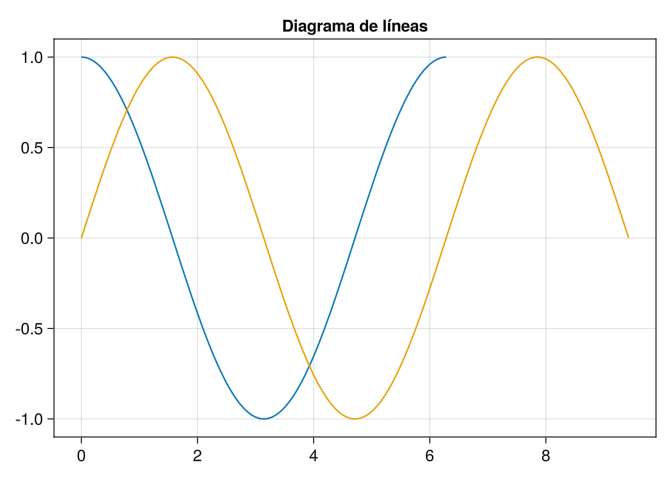

In [22]:
fig = Figure()
ax = Axis(fig[1, 1], title = "Diagrama de líneas")
lines!(ax, 0..2pi, cos)
lines!(ax, 0..3pi, sin)
fig

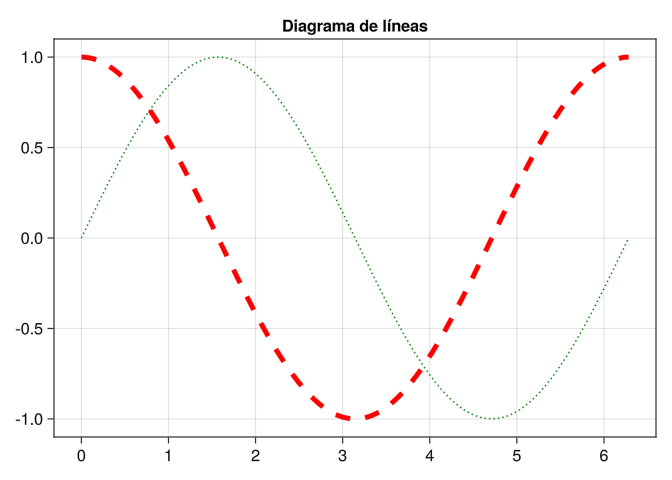

In [23]:
fig = Figure()
ax = Axis(fig[1, 1], title = "Diagrama de líneas")
lines!(ax, 0..2pi, cos, linewidth = 5, linestyle = :dash, color = :red)
lines!(ax, 0..2pi, sin, linestyle = :dot, color = :green)
fig

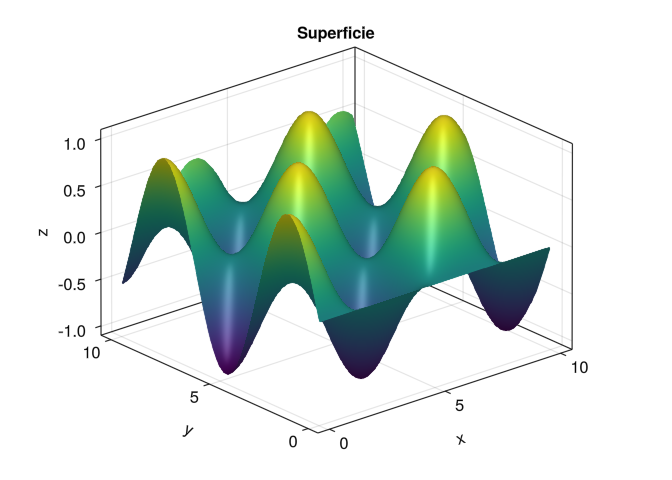

In [24]:
fig = Figure()
ax = Axis3(fig[1, 1], title = "Superficie")
xs = ys = LinRange(0, 10, 100)
zs = [cos(x) * sin(y) for x in xs, y in ys]
Makie.surface!(ax, xs, ys, zs)
fig

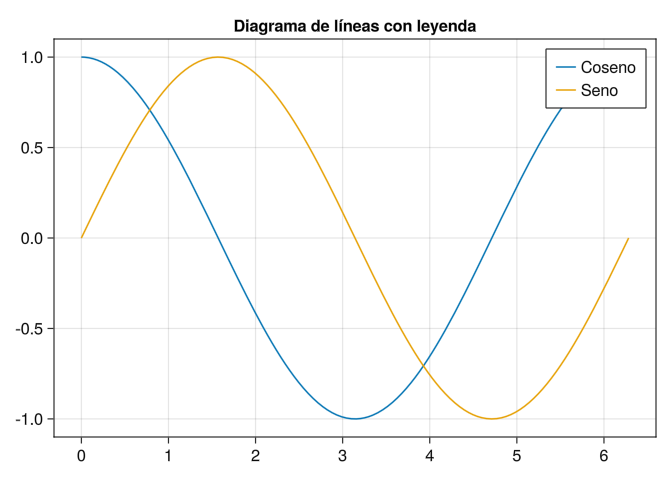

In [25]:
fig = Figure()
ax = Axis(fig[1, 1], title = "Diagrama de líneas con leyenda")
lines!(ax, 0..2pi, cos, label = "Coseno")
lines!(ax, 0..2pi, sin, label = "Seno")
axislegend()
current_figure()